# Deep learning from scratch: homework 1

### Haoyang Han hhr8512

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 4. </span>  Normalizing the input of a student debt dataset

In this exercise you will repeat the experiment shown in [Example 1 of Section 8.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/8_Linear_regression/8_4_feature_scaling.html) where standard normalization was shown to enormously improve our ability to perform linear regression using gradient descent on the following student loan dataset.

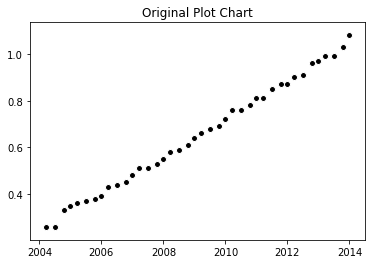

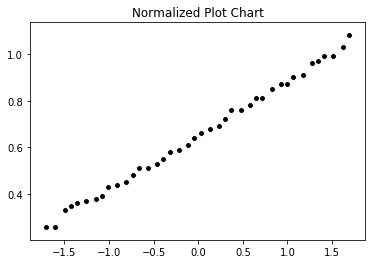

In [2]:
# data input
csvname = 'student_debt.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:] 

# scatter plot the input data
plt.figure()
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.title("Original Plot Chart")
plt.show()

# Normalization
x1 = (x - np.mean(x))/np.std(x)
plt.figure()
plt.scatter(x1,y,color = 'k',edgecolor = 'w')
plt.title("Normalized Plot Chart")
plt.show()

Compare a run of gradient descent using a maximum of $100$ iterations on the original input, to one run when using standard normalized input, where both runs are initialized at the point $\mathbf{w} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$.  Note here that you will likely not achieve any kind of meaningful convergence when minimizing the cost over the original input (as detailed in the example), but for the standard normalized input you can definitely achieve convergence by properly tuning the steplength parameter.  Plot and compare the fit of each run on the original dataset.

Note that you do **not** need to produce the contour plots shown in the notes.

**Remember:** as described in the notes, in evaluating any new test input of a model (learned on normalized training data) you need to normalize the test input precisely the way you did the training data.

## Here is my solution:








In [3]:
# This is a gradient descent function

# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import value_and_grad 

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

In [4]:
# compute linear combination of input point
def model(x,w):    
    # stack a 1 onto the top of each input point all at once
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    
    # compute linear combination and return
    a = np.dot(x.T,w)
    return a

# an implementation of the least squares cost function for linear regression
def least_squares(w):    
    # compute the least squares cost
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(len(y))




In [5]:
# warning is not logged here. Perfect for clean unit test output
w = np.array([0.0,0.0])[:,np.newaxis]
g = least_squares
max_its = 100
alpha_choice = 10**(-7)
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

In [6]:
# show run on contour plot
#static_plotter.two_input_contour_plot(g,weight_history,xmin = -3,xmax = 7,ymin = -1,ymax = 12,num_contours = 7,show_original = False)

[[  1.55147320e-07]
 [  3.25057924e-04]]
[ 0.650116    0.65018167  0.65024734  0.65031301  0.65037868  0.65044434
  0.65051001  0.65057568  0.65064135  0.65070702  0.65077269  0.65083835
  0.65090402  0.65096969  0.65103536  0.65110103  0.6511667   0.65123236
  0.65129803  0.6513637   0.65142937  0.65149504  0.65156071  0.65162637
  0.65169204  0.65175771  0.65182338  0.65188905  0.65195471  0.65202038
  0.65208605  0.65215172  0.65221739  0.65228306  0.65234872  0.65241439
  0.65248006  0.65254573  0.6526114   0.65267707  0.65274273  0.6528084
  0.65287407  0.65293974  0.65300541  0.65307108  0.65313674  0.65320241
  0.65326808  0.65333375  0.65339942  0.65346508  0.65353075  0.65359642
  0.65366209  0.65372776  0.65379343  0.65385909  0.65392476  0.65399043
  0.6540561   0.65412177  0.65418744  0.6542531   0.65431877  0.65438444
  0.65445011  0.65451578  0.65458145  0.65464711  0.65471278  0.65477845
  0.65484412  0.65490979  0.65497546  0.65504112  0.65510679  0.65517246
  0.6552381

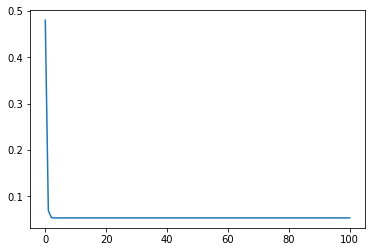

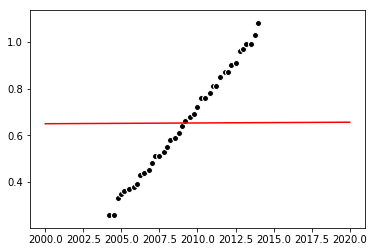

In [8]:
ind = np.argmin(cost_history_1)
least_weights = weight_history_1[ind]
print(least_weights)
x_vals = np.linspace(2000,2020,100)
y_vals = least_weights[0] + least_weights[1]*x_vals
print(y_vals)

plt.plot(cost_history_1)
plt.show()
plt.figure()
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.plot(x_vals,y_vals,color = 'r')
# plt.scatter(least_weights, color = 'r')
plt.show()


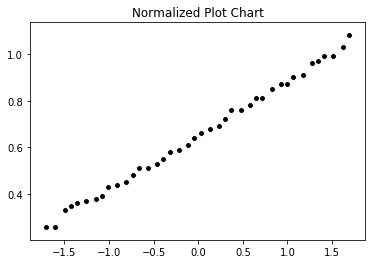

In [9]:
# Normalization
x1 = (x - np.mean(x))/np.std(x)
plt.figure()
plt.scatter(x1,y,color = 'k',edgecolor = 'w')
plt.title("Normalized Plot Chart")
plt.show()



In [10]:
def model1(x,w):    
    # stack a 1 onto the top of each input point all at once
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    
    # compute linear combination and return
    a = np.dot(x.T,w)
    return a

# an implementation of the least squares cost function for linear regression
def least_squares_2(w):    
    # compute the least squares cost
    cost = np.sum((model1(x1,w) - y)**2)
    return cost/float(len(y))

In [11]:
# Gradient_descent for normalized x


g = least_squares_2; 
w = np.array([0.0,0.0])[:,np.newaxis]; 
max_its = 1000; 
alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)




[[ 0.65275   ]
 [ 0.23199543]]
[ 0.25492052  0.26295748  0.27099444  0.2790314   0.28706836  0.29510532
  0.30314228  0.31117923  0.31921619  0.32725315  0.33529011  0.34332707
  0.35136403  0.35940099  0.36743795  0.37547491  0.38351187  0.39154883
  0.39958579  0.40762275  0.4156597   0.42369666  0.43173362  0.43977058
  0.44780754  0.4558445   0.46388146  0.47191842  0.47995538  0.48799234
  0.4960293   0.50406626  0.51210321  0.52014017  0.52817713  0.53621409
  0.54425105  0.55228801  0.56032497  0.56836193  0.57639889  0.58443585
  0.59247281  0.60050977  0.60854672  0.61658368  0.62462064  0.6326576
  0.64069456  0.64873152  0.65676848  0.66480544  0.6728424   0.68087936
  0.68891632  0.69695328  0.70499023  0.71302719  0.72106415  0.72910111
  0.73713807  0.74517503  0.75321199  0.76124895  0.76928591  0.77732287
  0.78535983  0.79339679  0.80143374  0.8094707   0.81750766  0.82554462
  0.83358158  0.84161854  0.8496555   0.85769246  0.86572942  0.87376638
  0.88180334  0.88984

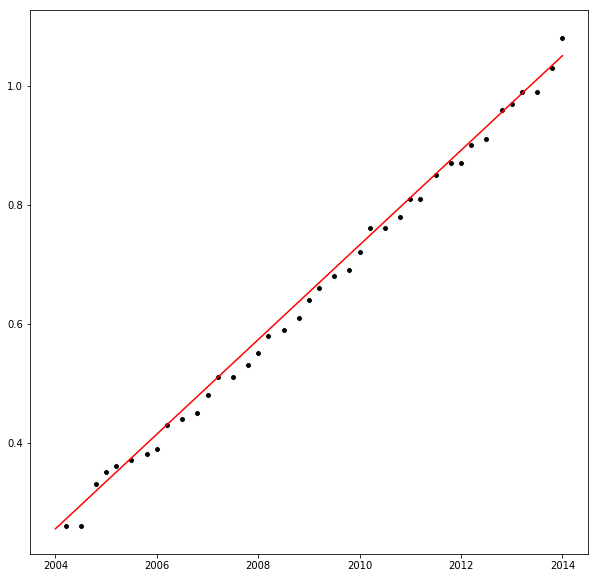

In [17]:
ind = np.argmin(cost_history_2)
least_weights_2 = weight_history_2[ind]
print(least_weights_2)


# We need to add back the 

x_vals = np.linspace(2004,2014,100)
x_means = np.mean(x_vals)
x_stds = np.std(x_vals)
x_vals_norm = (x_vals - x_means)/x_stds
y_vals = least_weights_2[0] + least_weights_2[1]*x_vals_norm
print(y_vals)

plt.figure(figsize=(10,10)) 
plt.scatter(x,y,color = 'k',edgecolor = 'w')
plt.plot(x_vals,y_vals,color = 'r')
plt.show()